---
# FoodHub Data Analysis
---

## Introduction

As the number of restaurants in New York continues to grow, busy students and professionals increasingly rely on food delivery services. FoodHub, a food aggregator app, connects customers with multiple restaurants, streamlining the ordering and delivery process.

The app facilitates direct orders from customers, assigns delivery personnel, and allows for real-time tracking and feedback. FoodHub collects data on these orders, which can provide insights into restaurant demand and enhance customer experience. This project aims to analyze this data to address key questions that will help FoodHub improve its services and business strategy.

### Dataset

The data contains the different data related to a food order. The detailed data dictionary is given below.

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Questions for Analysis

The following questions will guide the analysis:
* Which are the top 5 restaurants in terms of the number of orders received?
* The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. What are the restaurants fulfilling the criteria to get the promotional offer?
* The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. What is the net revenue generated by the company across all orders?
* The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? 
* The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

---
## Environment setup

### Importing the libraries

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

---
## Exploring the data

### Overview of the data

In [4]:
# load the dataset
df = pd.read_csv('foodhub_order.csv')

In [5]:
# look at the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [6]:
# check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### Dealing with missing values
The information of the dataframe shows that there are 1898 rows and all of the columns have 1898 non-null values. Nevertheless, we should take a closer look to the column 'rating' because, according to the data dictionary, the rating is given by a number but we just saw that the data type of the column 'rating' is object.

In [7]:
# check the values that can be found in the column 'rating'
df.rating.unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [8]:
# find the amount of rows with the value 'Not given'
not_given = df[df['rating'] == 'Not given'].shape[0]
# calculate the percentage of rows with 'Not given'
print(f"There are {not_given} 'Not given' values, which represent the {(not_given/df.shape[0])*100:.2f}% of rows")

There are 736 'Not given' values, which represent the 38.78% of rows


In [9]:
# convert the 'rating' column to numeric
df['rating'] = pd.to_numeric(df['rating'], errors = 'coerce')
df['rating'].dtype

dtype('float64')

In [10]:
# calculate the mean of the column
rating_mean = df['rating'].mean()
# calculate the median of the column
rating_median = df['rating'].median()
print(f'Mean = {rating_mean:.2f}\nMedian = {rating_median:.2f}')

Mean = 4.34
Median = 5.00


In [12]:
# fill missing values in 'rating' with the mean
df.fillna({'rating': rating_mean}, inplace=True)
# validate that there are no missing values in 'rating'
df['rating'].isna().sum()

np.int64(0)

In [15]:
# show the statistical summary of data
df.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.344234,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.580071,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,4.344234,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


---
## Exploratory Data Analysis (EDA)

### Univariate Analysis

**Exploration of the numerical variables**

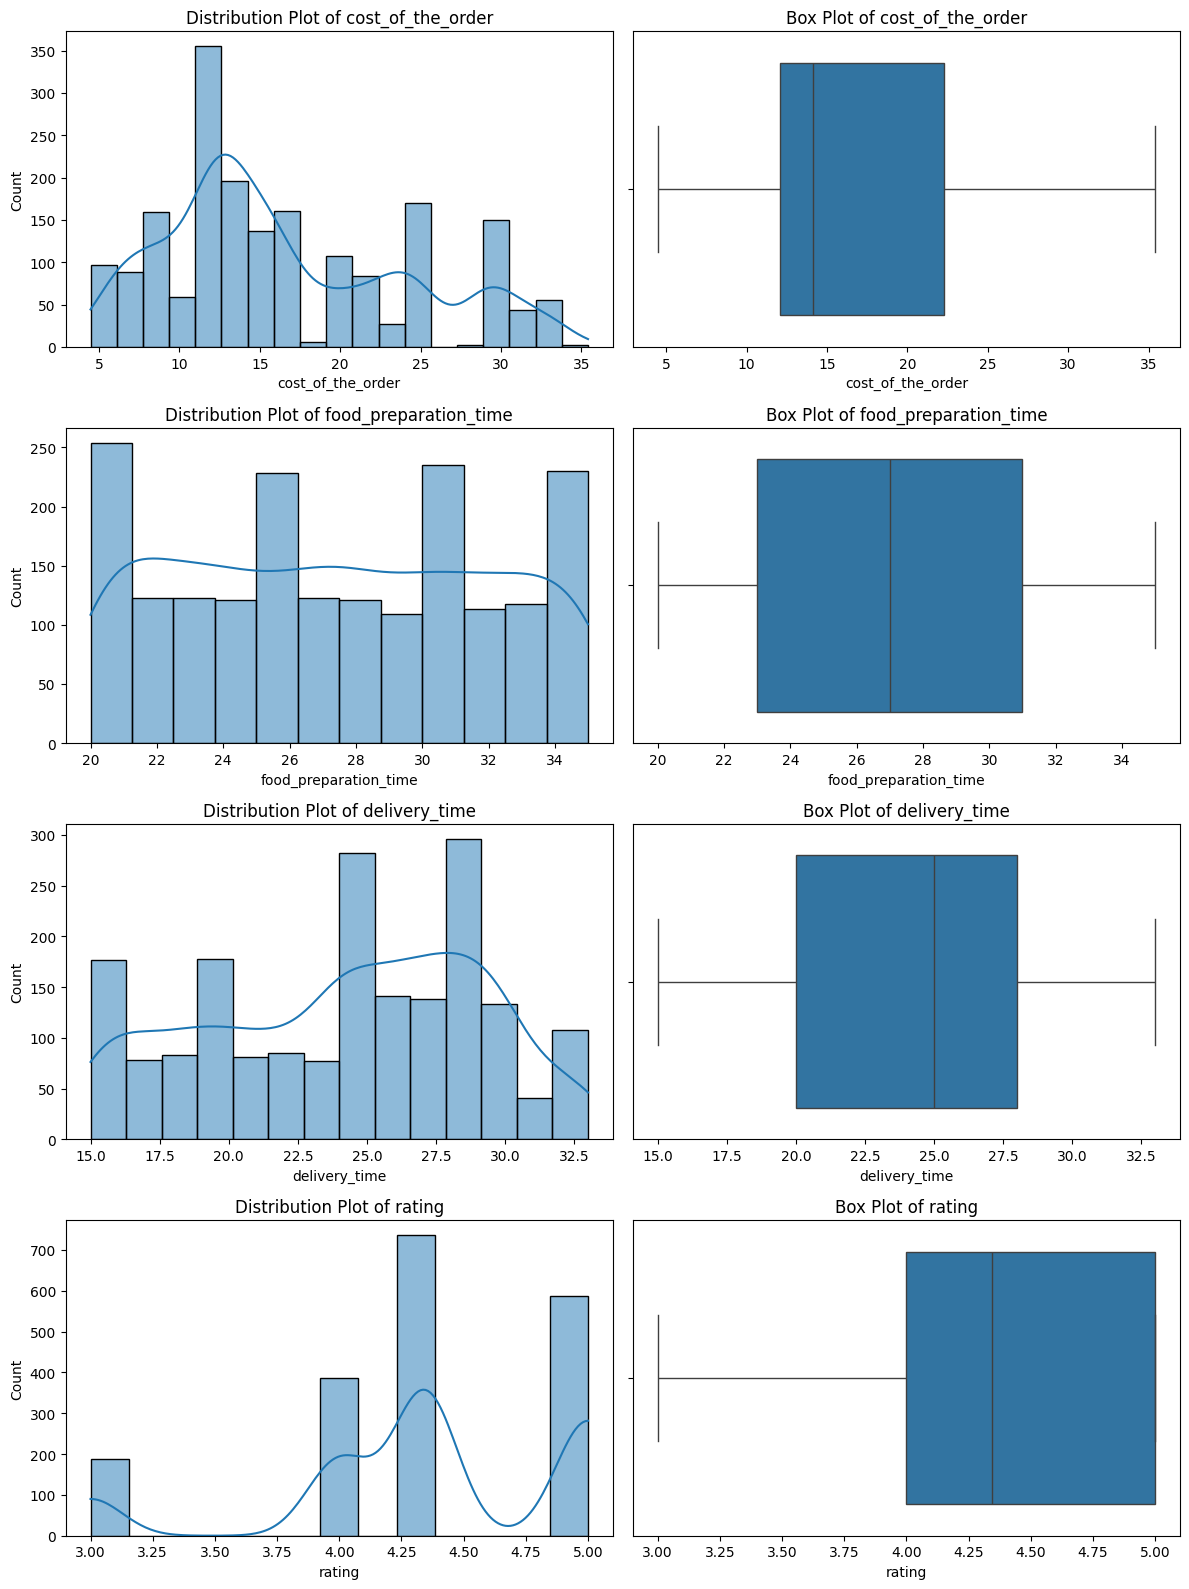

In [16]:
# display the distribution plot and box plot of the numeric variables of interest
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

# Distribution plot of cost_of_the_order
sns.histplot(df['cost_of_the_order'], kde=True, ax=axes[0,0])
axes[0,0].set_title('Distribution Plot of cost_of_the_order')

# Boxplot of cost_of_the_order
sns.boxplot(x=df['cost_of_the_order'], ax=axes[0,1])
axes[0,1].set_title('Box Plot of cost_of_the_order')

# Distribution plot of food_preparation_time
sns.histplot(df['food_preparation_time'], kde=True, ax=axes[1,0])
axes[1,0].set_title('Distribution Plot of food_preparation_time')

# Boxplot of food_preparation_time
sns.boxplot(x=df['food_preparation_time'], ax=axes[1,1])
axes[1,1].set_title('Box Plot of food_preparation_time')

# Distribution plot of delivery_time
sns.histplot(df['delivery_time'], kde=True, ax=axes[2,0])
axes[2,0].set_title('Distribution Plot of delivery_time')

# Boxplot of delivery_time
sns.boxplot(x=df['delivery_time'], ax=axes[2,1])
axes[2,1].set_title('Box Plot of delivery_time')

# Distribution plot of rating
sns.histplot(df['rating'], kde=True, ax=axes[3,0])
axes[3,0].set_title('Distribution Plot of rating')

# Boxplot of rating
sns.boxplot(x=df['rating'], ax=axes[3,1])
axes[3,1].set_title('Box Plot of rating')

# Display the plots
plt.tight_layout()
plt.show()

**Exploration of the categorical variables**

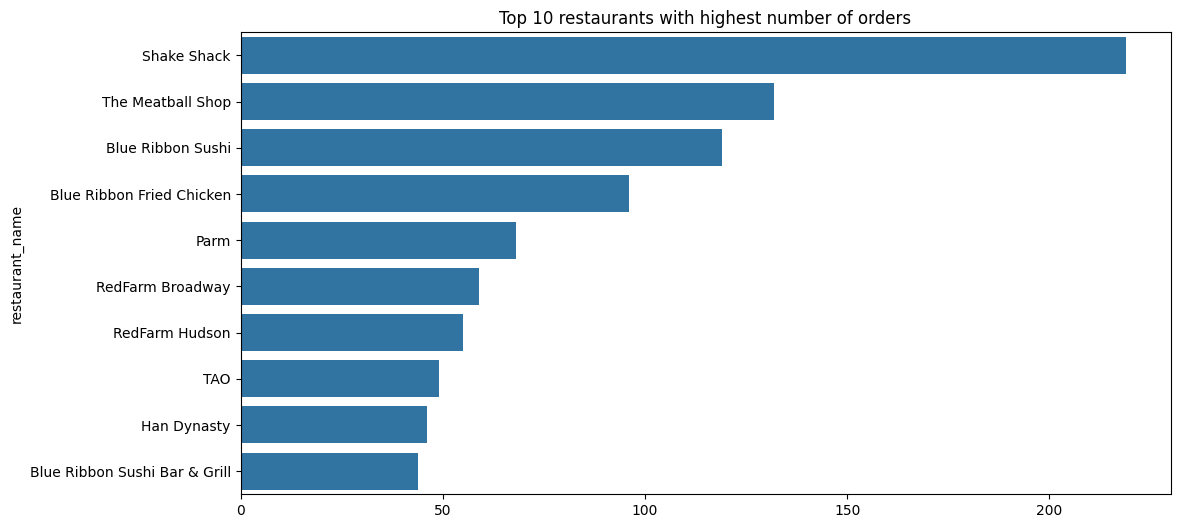

In [17]:
# since there is a large number of restaurants I will focus the analysis on the top 10
# identify the 10 restaurants with highest counts in the dataset
top10_restaurants = df['restaurant_name'].value_counts().nlargest(10)

# bar plot for the top 10 restaurants with highest number of orders
plt.figure(figsize=(12,6))
plt.title('Top 10 restaurants with highest number of orders')
sns.barplot(x=top10_restaurants.values, y=top10_restaurants.index)
plt.show()

In [18]:
# since Shake Shack receives a significantly higher number of orders compared to other restaurants, I want to know its cuisine type
df[df['restaurant_name'] == 'Shake Shack']['cuisine_type'].unique()

array(['American'], dtype=object)

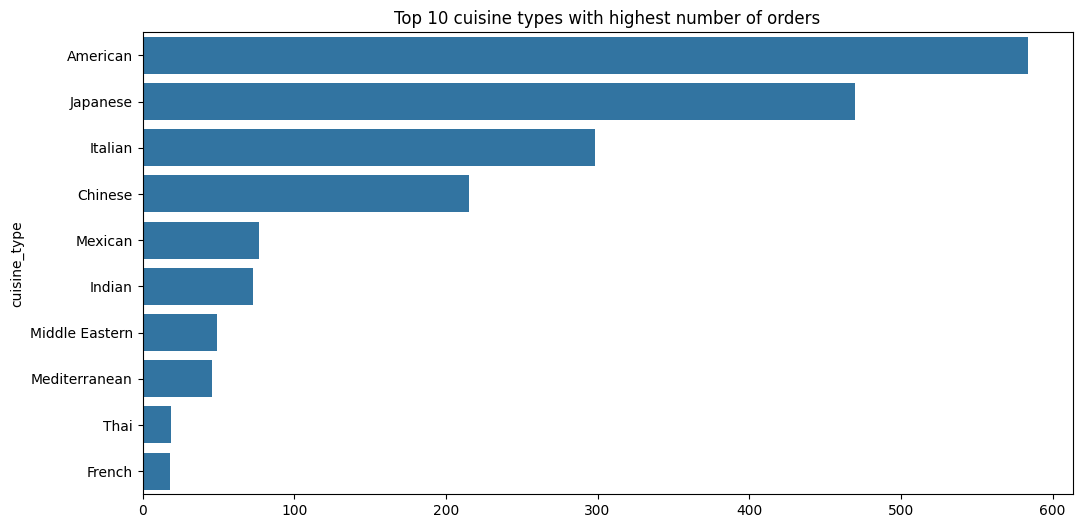

In [19]:
# identify the 10 cuisine types with highest counts in the dataset
top10_cuisine_types = df['cuisine_type'].value_counts().nlargest(10)

# bar plot for the top 10 cuisine types with the highest number of orders
plt.figure(figsize=(12,6))
plt.title('Top 10 cuisine types with highest number of orders')
sns.barplot(x=top10_cuisine_types.values, y=top10_cuisine_types.index)
plt.show()

<Axes: xlabel='day_of_the_week', ylabel='count'>

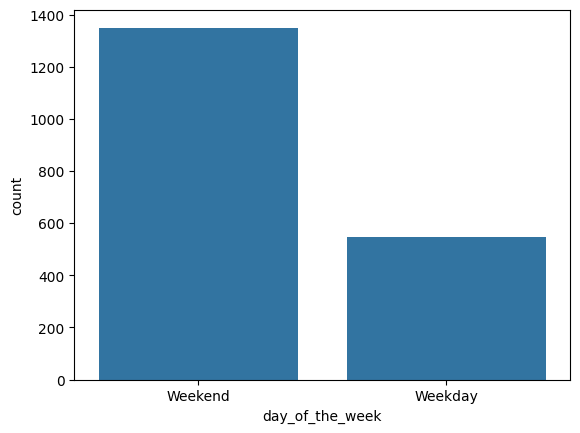

In [20]:
# plot for the days of the week
sns.countplot(x='day_of_the_week', data=df)

Observations:

* Shake Shack is the restaurant with the highest number of orders received, with approximately 90 more orders than The Meatball Shop, which is in second place.
* American is the cuisine type with highest number of orders. It is also the cuisine type of the top restaurant (Shake Shack).
* More than 50% of the orders received are for the top 2 cuisine types (American and Japanese).
* The number of orders received is higher on weekends. The orders received on weekends is more than double the orders received on weekdays.

**Top 3 most frequent customers and the number of orders they placed**

In [22]:
# find the 3 customer IDs with the highest count
df['customer_id'].value_counts().nlargest(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

### Which are the top 5 restaurants in terms of the number of orders received?

In [21]:
# get the names of the top 5 restaurants
top5_restaurants = df['restaurant_name'].value_counts().nlargest(5)
# join the restaurant names into a single string separated by commas
restaurant_list = ', '.join(top5_restaurants.index)
print(f'The top 5 restaurants in terms of the number of orders received are {restaurant_list}.')

The top 5 restaurants in terms of the number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm.


### Multivariate Analysis

<Axes: >

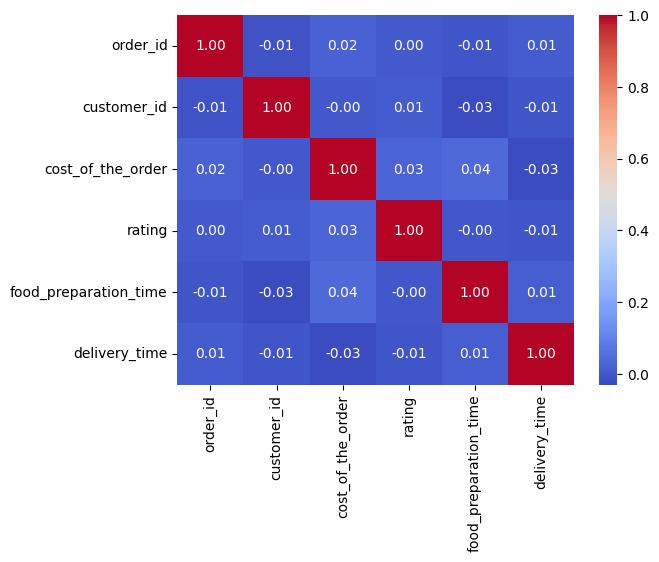

In [23]:
# calculate correlation for numerical variables
corr = df.select_dtypes(include='number').corr()
# plot the correlation using a heatmap
sns.heatmap(corr,annot=True, cmap='coolwarm', fmt='.2f')

There are no significant correlations between the numerical values.

Text(0.5, 1.0, 'Cost of order across cuisine types')

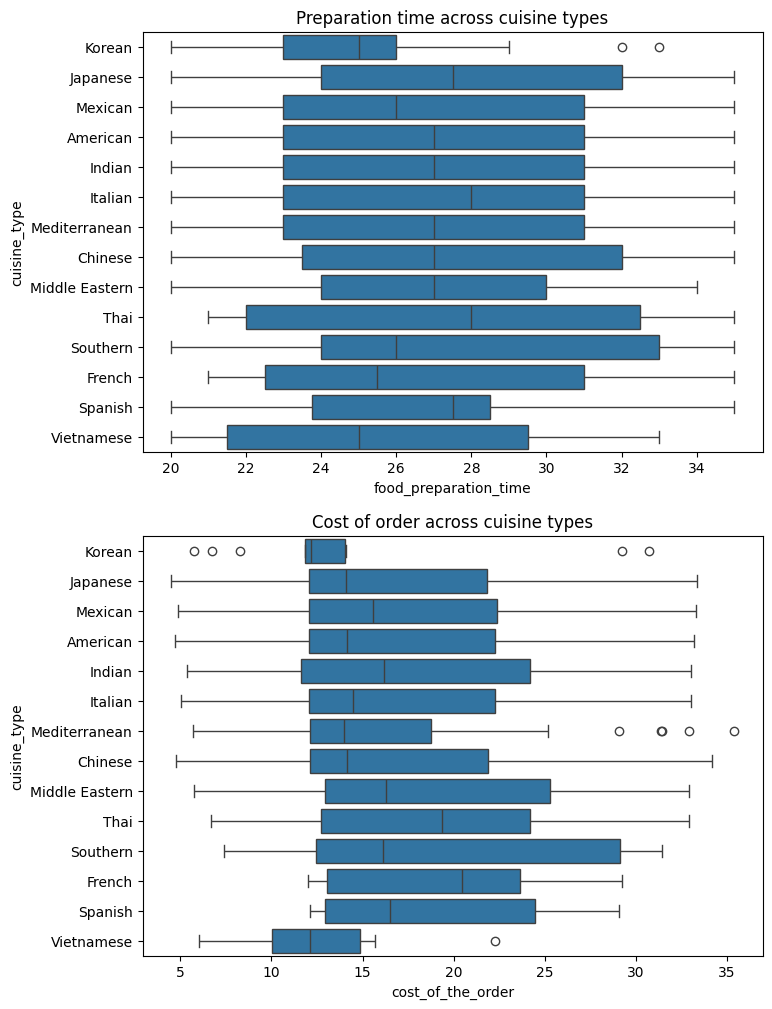

In [24]:
# display a couple of box plots related to the cuisine type
fig, axes = plt.subplots(2, 1, figsize=(8, 12))

# cuisine type vs food_preparation_time
sns.boxplot(data=df, x='food_preparation_time', y='cuisine_type', ax=axes[0])
axes[0].set_title('Preparation time across cuisine types')
# cuisine type vs cost_of_the_order
sns.boxplot(data=df, x='cost_of_the_order', y='cuisine_type', ax=axes[1])
axes[1].set_title('Cost of order across cuisine types')

In [25]:
# there is a large number of restaurants in the dataset so I will take only the top 10 for the following analysis
# identify the 10 restaurants with highest counts in the dataset
top10_restaurants = df['restaurant_name'].value_counts().nlargest(10).index
# create a dataframe with the data for the top 10 restaurants
df_top10 = df[df['restaurant_name'].isin(top10_restaurants)]

Text(0.5, 1.0, 'Cost of order across Restaurant name')

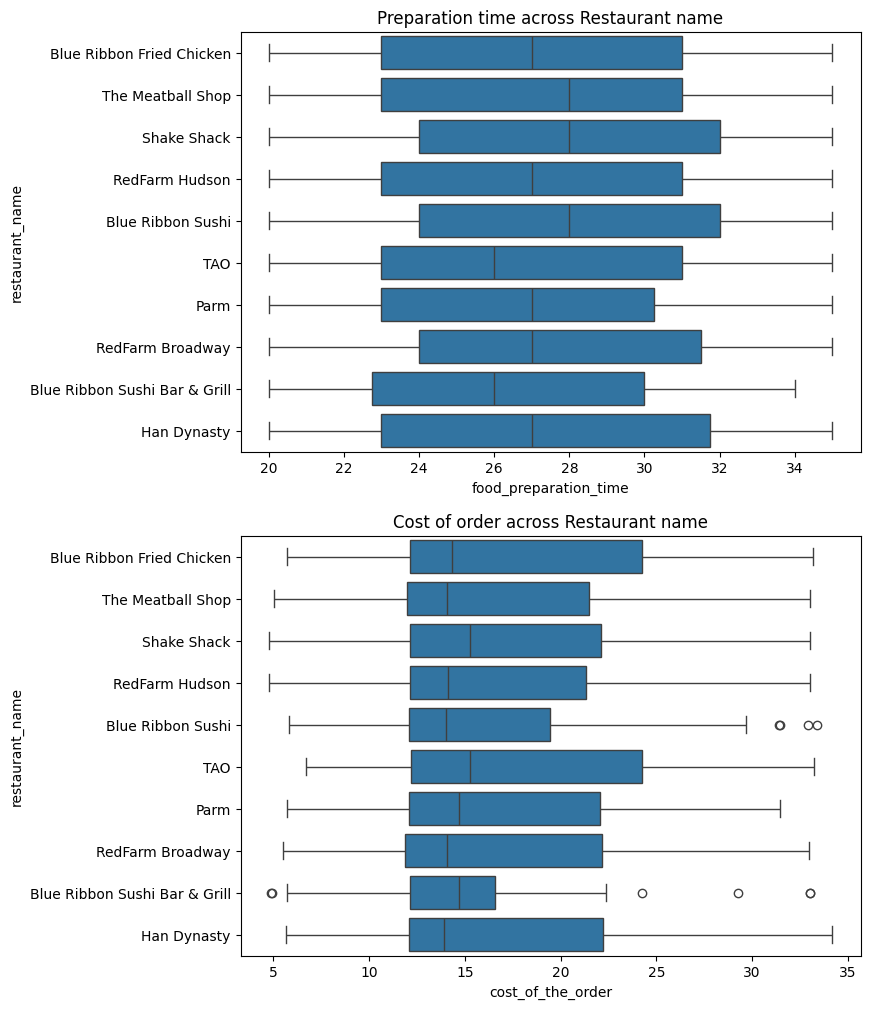

In [26]:
# plot the food preparation time and cost of order for the top 10 restaurants
fig, axes = plt.subplots(2, 1, figsize=(8, 12))

# restaurant name vs food_preparation_time
sns.boxplot(data=df_top10, x='food_preparation_time', y='restaurant_name', ax=axes[0])
axes[0].set_title('Preparation time across Restaurant name')
# restaurant name vs cost_of_the_order
sns.boxplot(data=df_top10, x='cost_of_the_order', y='restaurant_name', ax=axes[1])
axes[1].set_title('Cost of order across Restaurant name')

### Find the restaurants that have a rating count of more than 50 and an average rating greater than 4

In [27]:
# previously I filled missing values in the column 'rating' with the mean of the variable
# I will create a dataframe with all the rows that had numerical values in the original data
# we already know that 'rating' only contained the following numerical values '3', '4', '5'
df_rating = df[df['rating'].isin([3.0, 4.0, 5.0])]
# count for 'restaurant_name'
restaurant_counts = df_rating['restaurant_name'].value_counts()
# get the restaurants that have more than 50 counts
rest_more_than_50 = restaurant_counts[restaurant_counts > 50].index
# create a dataframe with the restaurants with more than 50 ratings
df_more_than_50 = df_rating[df_rating['restaurant_name'].isin(rest_more_than_50)]
# group by 'restaurant_name' and calculate the mean rating for each restaurant
mean_ratings = df_more_than_50.groupby('restaurant_name')['rating'].mean()
print(mean_ratings)

restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating, dtype: float64


There are 4 restaurants fulfilling the criteria to get the promotional offer:
* Blue Ribbon Fried Chicken
* Blue Ribbon Sushi
* Shake Shack
* The Meatball Shop

### What is the net revenue generated by the company across all orders?

In [28]:
# find orders with cost greater than 20 dollars
orders_20 = df[df['cost_of_the_order'] > 20]
# sum the total cost
cost_orders_20 = orders_20['cost_of_the_order'].sum()
# calculate the revenue as 25% of total cost
revenue_20 = 0.25 * cost_orders_20
# find orders with cost greater than 5 dollars but lower than or equal to 20 dollars
orders_5 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]
# sum the total cost
cost_orders_5 = orders_5['cost_of_the_order'].sum()
# calculate the revenue as 15% of total cost
revenue_5 = 0.15 * cost_orders_5
net_revenue = revenue_20 + revenue_5
print(f'The net revenue generated by the company is {net_revenue:.1f} dollars')

The net revenue generated by the company is 6166.3 dollars


In [29]:
# find out if there are orders with a cost lower than or equal to 5 dollars
df[df['cost_of_the_order'] <= 5].value_counts()

order_id  customer_id  restaurant_name                cuisine_type  cost_of_the_order  day_of_the_week  rating    food_preparation_time  delivery_time
1476877   53289        The Loop                       Japanese      4.66               Weekend          4.344234  34                     25               1
1476909   366975       Blue Ribbon Sushi Bar & Grill  Japanese      4.85               Weekend          5.000000  20                     21               1
1477196   50123        Cafe Habana                    Mexican       4.85               Weekend          5.000000  28                     22               1
1477349   52327        Nobu Next Door                 Japanese      4.47               Weekend          5.000000  28                     26               1
1477786   145389       RedFarm Hudson                 Chinese       4.75               Weekend          3.000000  23                     25               1
1477787   14869        Shake Shack                    American      4

Onservations:

* The net revenue generated by the company is approximately 6,166 dollars.
* There are 9 orders with a cost below 5 dollars. Since the company doesn't charge restaurants for these orders, they did not generate any revenue for the company.

### What percentage of orders take more than 60 minutes to get delivered from the time the order is placed?

In [30]:
# create a column with the sum of the preparation time and the delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
# create a dataframe with orders that take more than 60 minutes
df_time60 = df[df['total_time'] > 60]
# calculate the percentage of orders that take more than 60 minutes
perc = 100*df_time60.shape[0]/df.shape[0]
print(f'{perc:.2f}% of orders take more than 60 minutes to get delivered from the time the order is placed')

10.54% of orders take more than 60 minutes to get delivered from the time the order is placed


### How does the mean delivery time vary during weekdays and weekends?

The mean delivery time on weekdays is 28.34 minutes. On weekends it is 22.47 minutes


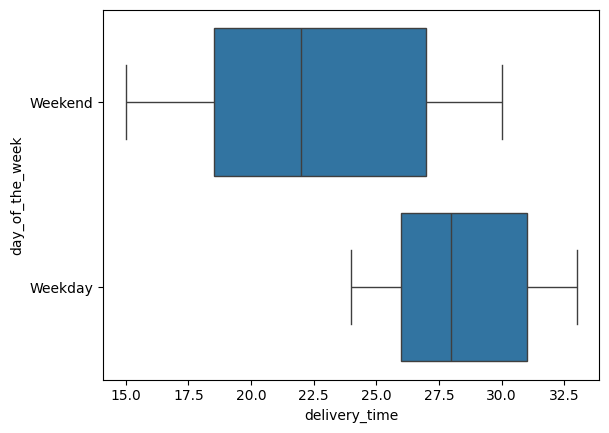

In [31]:
# show the box plot to get an idea on how different are the delivery times in weekdays and weekends
sns.boxplot(data=df, x='delivery_time', y='day_of_the_week')
# calculate the mean delivery time on weekdays
mean_weekday = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
# calculate the mean delivery time on weekends
mean_weekend = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print(f'The mean delivery time on weekdays is {mean_weekday:.2f} minutes. On weekends it is {mean_weekend:.2f} minutes')

The average delivery time on weekdays is 28.34 minutes, compared to 22.47 minutes on weekends. The average delivery time on weekdays is approximately 6 minutes longer than that on weekends.

### Conclusions:

* The top 5 restaurants in terms of the number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.
* There are 4 restaurants that have a rating count of more than 50 and an average rating greater than 4: Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop.
* The net revenue generated by the company is 6,166.3 dollars. There are orders that are not generating revenue for the company because their cost is below 5 dollars and the company doesn't charge restaurants for these orders.
* 10.54% of orders take more than 60 minutes to get delivered from the time the order is placed.
* The average delivery time on weekdays is approximately 6 minutes longer than that on weekends.
* A lot of orders (more than 700) didn't receive ratings in the app. However, we can say there are no bad reviews given that there were no ratings below 3 out of 5.
* The time to prepare the food ranges between 20 and 35 minutes with an average time of approximately 27 minutes.
* Over 50% of the orders are for the top 2 cuisine types, American and Japanese, with American having the highest number of orders.
* Korean cuisine tends to have shorter preparation times and has the narrowest range of cost of order, indicating more consistency in thier costs.
* Orders received on weekends are more than double those received on weekdays.

### Recommendations:

* The company should implement a campaign to encourage customers to rate their orders, as ratings are crucial for understanding customer satisfaction.
* Create a section in the app displaying the top 5 restaurants and collaborate with those restaurants to offer exclusive deals.
* Since customers tend to place more orders on weekends, consider sending a message via the app on weekends to encourage customers to order their food from the app.
* Implement a small service charge for orders that cost less than 5 dollars to get some revenue from those orders.
* Including the order dates in the dataset would help the company understand how frequently customers use the app. Currently, we know that the most frequent customer has placed 13 orders, but we lack information on the time period during which these orders occurred.